In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#LOADING DATA
filename = os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTest.csv")
test=pd.read_csv(filename,low_memory=False)

filename =os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTrain.csv")
train=pd.read_csv(filename,low_memory=False)


In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train.shape

(1296675, 23)

In [5]:
test.shape

(555719, 23)

In [6]:
#changing gender to 1 and 2 int
test['gender'] = test['gender'].replace({'M':1, 'F': 0})
test['gender'].unique()

train['gender'] = train['gender'].replace({'M':1, 'F': 0})
train['gender'].unique()


array([0, 1])

In [7]:
#determining age from time of transaction
train[['Trans_Date', 'Trans_Time']] = train['trans_date_trans_time'].str.split(' ', n=1).tolist()

train['dob'] = pd.to_datetime(train['dob'])
train['Trans_Date'] = pd.to_datetime(train['Trans_Date'])
train['Age'] = train.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


train.drop(columns=['dob'], inplace=True, axis=1)


test[['Trans_Date', 'Trans_Time']] = test['trans_date_trans_time'].str.split(' ', n=1).tolist()

test['dob'] = pd.to_datetime(test['dob'])
test['Trans_Date'] = pd.to_datetime(test['Trans_Date'])
test['Age'] = test.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


test.drop(columns=['dob'], inplace=True, axis=1)

In [8]:
#creating new loaction feature from lat and long

train['location_matches'] = np.where((abs(train['lat'] - train['merch_lat']) < 0.5) & (abs(train['long'] - train['merch_long']) < 0.5), True, False)

#dropping the lat,long,merch lat, and merch long
train.drop('lat', inplace=True, axis=1)
train.drop('long', inplace=True, axis=1)
train.drop('merch_long', inplace=True, axis=1)
train.drop('merch_lat', inplace=True, axis=1)


test['location_matches'] = np.where((abs(test['lat'] - test['merch_lat']) < 0.5) & (abs(test['long'] - test['merch_long']) < 0.5), True, False)

test.drop('lat', inplace=True, axis=1)
test.drop('long', inplace=True, axis=1)
test.drop('merch_long', inplace=True, axis=1)
test.drop('merch_lat', inplace=True, axis=1)

In [9]:
# Convert string datetime to pandas datetime format for later use
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute
train['second'] = train['trans_date_trans_time'].dt.second

# Drop the original datetime column
train = train.drop(columns=['trans_date_trans_time'])


# Convert string datetime to pandas datetime format
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second

# Drop the original datetime column
test = test.drop(columns=['trans_date_trans_time'])

In [10]:
train.dtypes

Unnamed: 0                   int64
cc_num                       int64
merchant                    object
category                    object
amt                        float64
first                       object
last                        object
gender                       int64
street                      object
city                        object
state                       object
zip                          int64
city_pop                     int64
job                         object
trans_num                   object
unix_time                    int64
is_fraud                     int64
Trans_Date          datetime64[ns]
Trans_Time                  object
Age                          int64
location_matches              bool
year                         int64
month                        int64
day                          int64
hour                         int64
minute                       int64
second                       int64
dtype: object

In [11]:
#one hot encoding for category
train = pd.get_dummies(train, columns=['category'])
test = pd.get_dummies(test, columns=['category'])

In [12]:
#dropping columns that are not needed
columns_to_drop = ['Unnamed: 0','cc_num','city','year','minute','second','trans_num','Trans_Time','first','last','street','state','merchant','job','Trans_Date','gender']
train =train.drop(columns=columns_to_drop)
test =test.drop(columns=columns_to_drop)

In [13]:
train.dtypes

amt                        float64
zip                          int64
city_pop                     int64
unix_time                    int64
is_fraud                     int64
Age                          int64
location_matches              bool
month                        int64
day                          int64
hour                         int64
category_entertainment       uint8
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve,precision_score, recall_score, f1_score,roc_auc_score 

In [15]:
#Weigthed Oversampling
weights = np.where(train['is_fraud'] == 1, 10, 1)
sample_size = 1296675
train = train.sample(n=sample_size, replace=True, weights=weights)
print(train['is_fraud'].value_counts())


0    1225130
1      71545
Name: is_fraud, dtype: int64


In [16]:
combined_df = pd.concat([train, test])

In [17]:
# Splitting the oversampled data into train and test sets
x=combined_df.drop('is_fraud',axis=1)
y=combined_df['is_fraud']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [18]:
#logistic regression
logistic_regression=LogisticRegression(solver='liblinear',class_weight='balanced')
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9595
Precision: 0.4919
Recall: 0.7559
F1 Score: 0.5960
Confusion Matrix:
 [[516598  17153]
 [  5363  16605]]


In [19]:
#playing around with threshold since very few fraud cases
print("Regularization Strength (C):", logistic_regression.C)
print("Class Weights:", logistic_regression.class_weight)


threshold = 0.6 
print("Decision Threshold:", threshold)

probs = logistic_regression.predict_proba(x_test)[:, 1]
y_pred = [1 if p > threshold else 0 for p in probs]
print("Predicted Values (First 10):", y_pred[:10])


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Regularization Strength (C): 1.0
Class Weights: balanced
Decision Threshold: 0.6
Predicted Values (First 10): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9680935868667438
Precision: 0.5828218460455843
Recall: 0.6786234522942461
F1-score: 0.6270847792710372


In [22]:
params = { 'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] }#, 'class_weight': ['balanced', None],'multi_class': ['auto', 'ovr', 'multinomial']
grid_search = GridSearchCV(logistic_regression,params) 
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_) 

/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line sear

LogisticRegression(class_weight='balanced', solver='liblinear')


In [24]:
#LogisticRegression(multi_class='ovr', solver='newton-cholesky')
model = LogisticRegression(multi_class='ovr', solver='newton-cholesky')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


/Users/dariakhotunitskaya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.5274e-24): result may not be accurate.
  warnings.warn(


Accuracy Score: 0.973683
Precision Score: 0.814368
Recall Score: 0.432948
F1 Score: 0.565340


In [25]:
#playing around with threshold since very few fraud cases
print("Regularization Strength (C):", logistic_regression.C)
print("Class Weights:", logistic_regression.class_weight)


threshold = 0.6 
print("Decision Threshold:", threshold)

probs = logistic_regression.predict_proba(x_test)[:, 1]
y_pred = [1 if p > threshold else 0 for p in probs]
print("Predicted Values (First 10):", y_pred[:10])


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Regularization Strength (C): 1.0
Class Weights: balanced
Decision Threshold: 0.6
Predicted Values (First 10): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9680935868667438
Precision: 0.5828218460455843
Recall: 0.6786234522942461
F1-score: 0.6270847792710372


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("Confusion Matrix:")
print(cm)

#false positive, false negative, true positive, true negative
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

Confusion Matrix:
[[531433   2116]
 [ 12572   9598]]
True Negatives (TN): 531433
False Positives (FP): 2116
False Negatives (FN): 12572
True Positives (TP): 9598


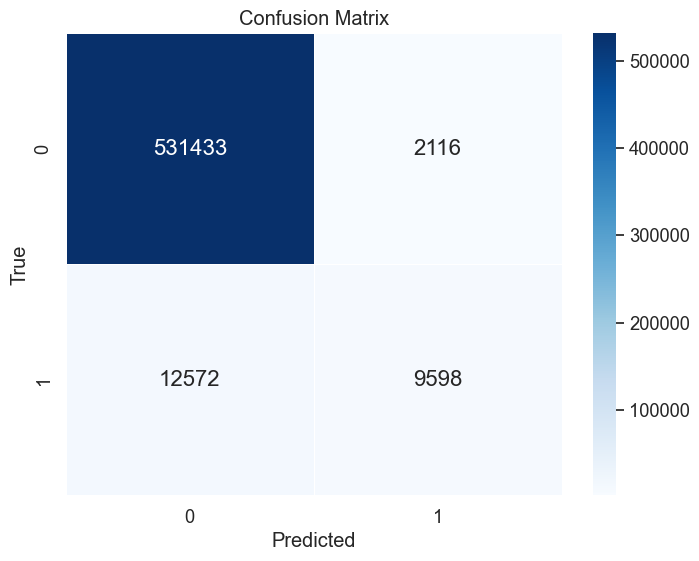

In [ ]:
#confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

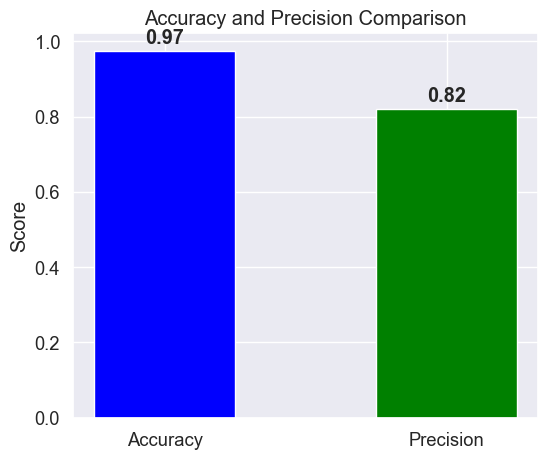

In [ ]:
#Accuracy and Precision Visualization
labels = ['Accuracy', 'Precision']
values = [accuracy, precision]

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['blue', 'green'], width = 0.5)
plt.ylabel('Score')
plt.title('Accuracy and Precision Comparison')


for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
values = [accuracy, precision]
print(values)

[0.9735693758896132, 0.8193614478401913]


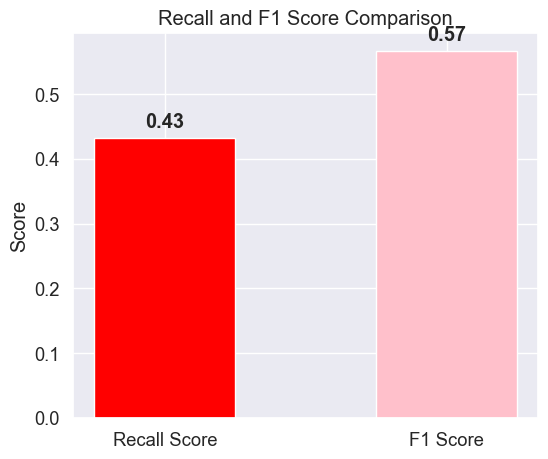

In [ ]:
#Recall and F1 Score Visualization

labels = ['Recall Score', 'F1 Score']
values = [recall, f1]

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['red', 'pink'], width = 0.5)
plt.ylabel('Score')
plt.title('Recall and F1 Score Comparison')


for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
values = [recall, f1]
print(values)

[0.4329273793414524, 0.5665210718923386]


In [ ]:
test.corr(numeric_only=True) 


,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,0.002310,0.002760,-0.000974,0.182267,-0.012864,0.001026,-0.000717,-0.000829,-0.029860,...,0.095858,-0.026328,-0.023448,-0.023499,0.013369,-0.011849,-0.037254,0.025627,0.014950,0.049389
zip,0.002310,1.000000,0.075571,0.001395,-0.002271,0.008283,-0.001031,0.001401,-0.000168,0.005966,...,-0.000483,0.001961,-0.002445,0.000420,0.003005,-0.004342,0.002701,0.007227,0.000285,-0.001303
city_pop,0.002760,0.075571,1.000000,-0.000740,-0.004910,-0.091733,-0.000497,-0.001117,0.001938,0.018937,...,-0.003473,-0.002742,-0.003174,0.001100,-0.003436,0.005423,-0.001508,0.002411,0.011438,-0.000691
unix_time,-0.000974,0.001395,-0.000740,1.000000,-0.013066,0.006830,0.001000,0.988955,0.044348,-0.000304,...,-0.000029,-0.000565,0.002446,-0.000891,0.000692,-0.000943,0.000908,-0.002036,0.002730,-0.001183
is_fraud,0.182267,-0.002271,-0.004910,-0.013066,1.000000,0.007334,0.000343,-0.011748,-0.009203,0.011686,...,0.027982,-0.010468,-0.013417,-0.012619,0.021642,-0.007383,-0.009257,0.037941,0.002115,-0.004551
Age,-0.012864,0.008283,-0.091733,0.006830,0.007334,1.000000,-0.000292,0.007967,-0.002373,-0.173695,...,0.016243,-0.001242,0.015517,0.023984,0.001437,-0.029438,0.016980,-0.018183,-0.017079,0.023434
location_matches,0.001026,-0.001031,-0.000497,0.001000,0.000343,-0.000292,1.000000,0.001227,-0.001621,0.000656,...,-0.000539,0.000532,-0.000100,0.000631,0.000704,0.000042,0.001690,-0.002243,-0.000191,0.001952
month,-0.000717,0.001401,-0.001117,0.988955,-0.011748,0.007967,0.001227,1.000000,-0.104058,-0.004995,...,0.001476,-0.001323,0.001587,-0.002100,0.001660,-0.000678,-0.000125,-0.001950,0.002798,-0.001833
day,-0.000829,-0.000168,0.001938,0.044348,-0.009203,-0.002373,-0.001621,-0.104058,1.000000,-0.000161,...,0.000470,-0.000597,-0.001337,0.001367,-0.001255,0.000801,0.000943,-0.000047,-0.000596,0.000404
hour,-0.029860,0.005966,0.018937,-0.000304,0.011686,-0.173695,0.000656,-0.004995,-0.000161,1.000000,...,-0.335816,0.182472,0.222705,0.212772,-0.168103,-0.080307,0.190671,-0.014840,0.000981,0.124404


In [ ]:
train.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,-0.029335,0.017545,0.001280,0.577751,0.072188,-0.020599,-0.032752,0.007654,0.279841,...,-0.086350,-0.150404,-0.138518,-0.182598,0.238941,-0.119013,-0.169499,0.558926,0.216245,-0.105926
zip,-0.029335,1.000000,0.101963,0.004032,-0.013260,0.004255,0.002645,-0.004292,0.016467,-0.020514,...,0.006796,0.002907,0.005992,0.007159,-0.009924,0.005153,0.009148,-0.014058,-0.017450,-0.011582
city_pop,0.017545,0.101963,1.000000,0.001101,0.008823,-0.057182,-0.001927,-0.006365,-0.005028,-0.017058,...,0.000089,0.003165,-0.004867,-0.006291,0.003991,-0.010018,-0.014941,0.020022,-0.001138,-0.006072
unix_time,0.001280,0.004032,0.001101,1.000000,-0.034912,0.035318,0.006336,0.227914,-0.002866,0.013690,...,-0.007253,0.002298,0.013607,-0.006532,0.000735,-0.000582,0.006291,0.005484,0.003604,-0.010294
is_fraud,0.577751,-0.013260,0.008823,-0.034912,1.000000,0.079090,-0.004205,-0.081445,0.023490,0.075468,...,0.175748,-0.123554,-0.148590,-0.118407,0.123041,-0.067636,-0.095477,0.205076,0.034249,-0.050064
Age,0.072188,0.004255,-0.057182,0.035318,0.079090,1.000000,-0.004308,0.003319,0.003599,0.036150,...,0.053021,-0.034484,-0.039148,-0.029904,0.053427,-0.032064,-0.019026,0.006134,0.011619,-0.000119
location_matches,-0.020599,0.002645,-0.001927,0.006336,-0.004205,-0.004308,1.000000,-0.002423,-0.007823,-0.011318,...,0.001335,0.000380,0.005474,0.003103,-0.003806,0.007530,0.004533,-0.011726,-0.007709,-0.008978
month,-0.032752,-0.004292,-0.006365,0.227914,-0.081445,0.003319,-0.002423,1.000000,0.012700,0.008400,...,-0.019814,0.012916,0.020428,-0.004282,-0.013166,0.000409,0.011425,-0.007139,-0.000024,-0.003989
day,0.007654,0.016467,-0.005028,-0.002866,0.023490,0.003599,-0.007823,0.012700,1.000000,0.012847,...,-0.001429,0.000512,0.000756,-0.000958,0.002652,0.004904,-0.016868,0.003106,-0.002909,0.001083
hour,0.279841,-0.020514,-0.017058,0.013690,0.075468,0.036150,-0.011318,0.008400,0.012847,1.000000,...,-0.405451,0.114261,0.143635,0.147358,0.060840,-0.048660,0.138619,0.229627,0.103247,0.098047


In [ ]:
combined_df.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,-0.025086,0.016060,-0.270222,0.629544,0.060939,-0.016256,-0.191040,-0.005554,0.237195,...,-0.023703,-0.128981,-0.124752,-0.153103,0.219880,-0.100398,-0.142831,0.501504,0.175805,-0.077974
zip,-0.025086,1.000000,0.094241,0.009048,-0.014180,0.005235,0.001567,0.001525,0.011717,-0.014178,...,0.004037,0.003082,0.003622,0.005334,-0.007349,0.002320,0.007343,-0.010050,-0.012554,-0.007911
city_pop,0.016060,0.094241,1.000000,-0.004566,0.009584,-0.066777,-0.001522,-0.007716,-0.003172,-0.007927,...,-0.000092,0.000696,-0.004700,-0.004147,0.002669,-0.005200,-0.010685,0.016579,0.002506,-0.004464
unix_time,-0.270222,0.009048,-0.004566,1.000000,-0.447467,0.002795,0.004984,0.537196,0.027803,-0.026268,...,-0.085093,0.048970,0.063839,0.045320,-0.054991,0.029342,0.042294,-0.092235,-0.013480,0.015083
is_fraud,0.629544,-0.014180,0.009584,-0.447467,1.000000,0.067227,-0.004116,-0.320280,-0.001882,0.079691,...,0.187760,-0.112287,-0.135141,-0.110756,0.131145,-0.065734,-0.089903,0.221508,0.035235,-0.047328
Age,0.060939,0.005235,-0.066777,0.002795,0.067227,1.000000,-0.003184,-0.006094,0.001187,-0.013937,...,0.045888,-0.023897,-0.021528,-0.012869,0.042306,-0.031796,-0.007993,0.003114,0.004048,0.006950
location_matches,-0.016256,0.001567,-0.001522,0.004984,-0.004116,-0.003184,1.000000,-0.000398,-0.005858,-0.008332,...,0.000633,0.000564,0.003614,0.002360,-0.002830,0.005084,0.003643,-0.009609,-0.005583,-0.005243
month,-0.191040,0.001525,-0.007716,0.537196,-0.320280,-0.006094,-0.000398,1.000000,0.006523,-0.015226,...,-0.064180,0.037294,0.048367,0.026671,-0.043524,0.018409,0.031427,-0.063998,-0.009123,0.009425
day,-0.005554,0.011717,-0.003172,0.027803,-0.001882,0.001187,-0.005858,0.006523,1.000000,0.008052,...,-0.004302,0.002096,0.002378,0.001869,-0.000632,0.004730,-0.008980,-0.001624,-0.002875,0.001683
hour,0.237195,-0.014178,-0.007927,-0.026268,0.079691,-0.013937,-0.008332,-0.015226,0.008052,1.000000,...,-0.384202,0.128531,0.159650,0.160001,0.017416,-0.058238,0.148306,0.186054,0.079126,0.102605


<AxesSubplot: >

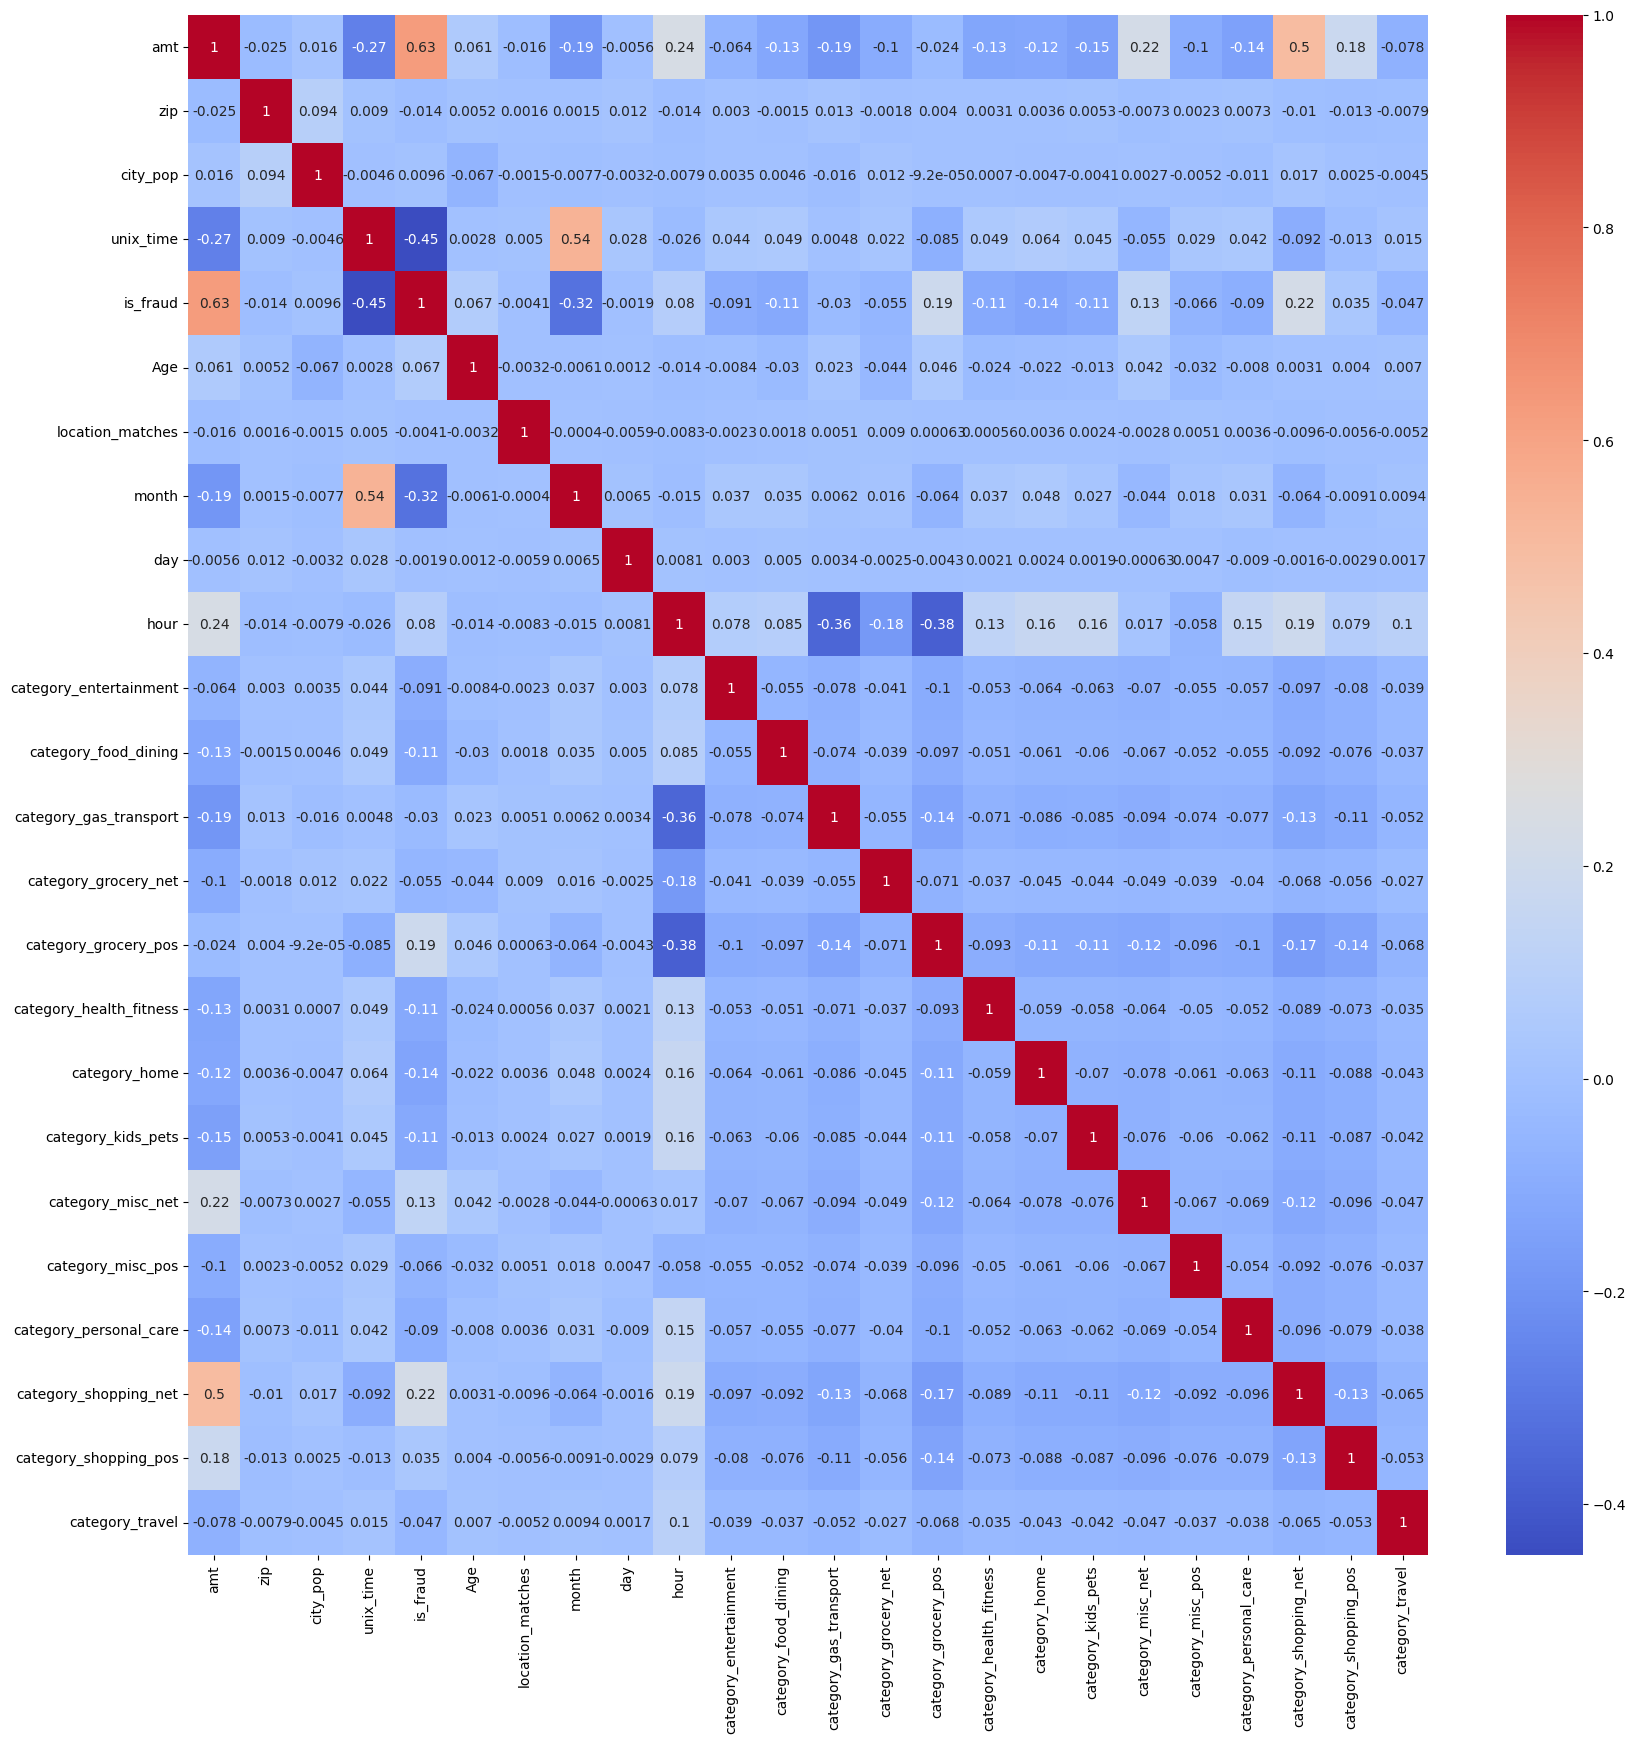

In [ ]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap(combined_df.corr(numeric_only=True),annot=True, cmap='coolwarm')